# Data import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import dill
import time

from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score

from multiprocessing import Pool
import multiprocessing as mp
from functools import partial
p

In [2]:
dill.load_session('19 18-27Mar.jupyterData')

In [2]:
f = pd.read_csv('result_CAMERA.csv').rename({'Unnamed: 0': 'F_index'}, axis=1)
f.head()

,F_index,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,X1,Filter_01.mzXML,...,Sample_3_3.mzXML,Sample_4_1.mzXML,Sample_4_2.mzXML,Sample_4_3.mzXML,Sample_5_1.mzXML,Sample_5_2.mzXML,Sample_5_3.mzXML,isotopes,adduct,pcgroup
0,1,80.025105,80.021111,80.049787,66.962585,60.763611,69.723999,34,26,1.985377e+06,...,2.549433e+06,9.425606e+05,1.275104e+06,5.246297e+04,3.778044e+05,2.334711e+06,1.844433e+06,NaN,[M+Na]+ 57.0325,156
1,2,81.017546,81.017490,81.017591,66.725952,61.166412,70.237854,36,36,2.299344e+07,...,1.145071e+07,4.506232e+06,5.898964e+06,7.796333e+06,4.082660e+06,9.782101e+06,1.010821e+07,NaN,NaN,156
2,3,81.045275,81.045213,81.070428,8.382844,2.581511,39.583630,64,30,9.452991e+05,...,3.132807e+06,1.200166e+06,4.941660e+06,1.260456e+06,1.056187e+06,9.543495e+05,2.396896e+06,NaN,NaN,3262
3,4,81.070211,81.033838,81.070354,445.544693,418.351501,446.324554,40,28,8.826248e+05,...,3.948975e+06,1.978841e+06,6.847747e+05,3.241769e+06,5.397383e+06,1.146643e+06,5.507006e+06,NaN,NaN,12
4,5,81.033907,81.032500,81.070209,278.781418,277.883911,311.960571,32,28,2.814078e+05,...,2.624762e+05,1.508501e+05,2.369215e+05,3.161576e+05,7.470728e+05,6.875941e+05,6.159486e+05,NaN,NaN,1918


In [3]:
fd = pd.concat([f.iloc[:, [0]], f.iloc[:, 1:9]], axis=1)
fd.columns

Index(['F_index', 'mz', 'mzmin', 'mzmax', 'rt', 'rtmin', 'rtmax', 'npeaks',
       'X1'],
      dtype='object')

In [4]:
into = pd.concat([f.iloc[:, [0]], f.iloc[:, 9:-3]], axis=1)
into.columns

Index(['F_index', 'Filter_01.mzXML', 'Filter_03.mzXML', 'Filter_05.mzXML',
       'Filter_075.mzXML', 'Filter_1.mzXML', 'Fiter_015.mzXML', 'QC_1_1.mzXML',
       'QC_1_2.mzXML', 'QC_1_3.mzXML', 'QC_2_1.mzXML', 'QC_2_2.mzXML',
       'QC_2_3.mzXML', 'QC_3_1.mzXML', 'QC_3_2.mzXML', 'QC_3_3.mzXML',
       'QC_4_1.mzXML', 'QC_4_2.mzXML', 'QC_4_3.mzXML', 'QC_5_1.mzXML',
       'QC_5_2.mzXML', 'QC_5_3.mzXML', 'Sample_1_1.mzXML', 'Sample_1_2.mzXML',
       'Sample_1_3.mzXML', 'Sample_2_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_2_3.mzXML', 'Sample_3_1.mzXML', 'Sample_3_2.mzXML',
       'Sample_3_3.mzXML', 'Sample_4_1.mzXML', 'Sample_4_2.mzXML',
       'Sample_4_3.mzXML', 'Sample_5_1.mzXML', 'Sample_5_2.mzXML',
       'Sample_5_3.mzXML'],
      dtype='object')

In [250]:
fd2 = pd.read_csv('fd_centroid.csv').rename({'Unnamed: 0':'F_index'}, axis=1)
into2 = pd.read_csv('int_centroid.csv').rename({'Unnamed: 0':'F_index'}, axis=1)
into2.head()

,F_index,Filter_01.mzXML,Filter_03.mzXML,Filter_05.mzXML,Filter_075.mzXML,Filter_1.mzXML,Fiter_015.mzXML,QC_1_1.mzXML,QC_1_2.mzXML,QC_1_3.mzXML,...,Sample_2_3.mzXML,Sample_3_1.mzXML,Sample_3_2.mzXML,Sample_3_3.mzXML,Sample_4_1.mzXML,Sample_4_2.mzXML,Sample_4_3.mzXML,Sample_5_1.mzXML,Sample_5_2.mzXML,Sample_5_3.mzXML
0,FT0001,1.985377e+06,4.908377e+06,6.936050e+06,8.752023e+06,1.064056e+07,2.909245e+06,1.204421e+06,5.782691e+05,2.358231e+05,...,2.416476e+06,1.060825e+05,1.235503e+06,2.549433e+06,9.425606e+05,1.275104e+06,2.468845e+04,1.840586e+05,2.334711e+06,1.844433e+06
1,FT0002,2.299344e+07,5.211685e+07,7.504573e+07,9.232607e+07,1.060672e+08,3.184920e+07,7.146624e+06,6.044513e+06,7.057294e+06,...,1.139188e+07,5.212445e+06,7.941546e+06,1.145071e+07,4.506232e+06,5.898964e+06,7.796333e+06,4.082660e+06,9.782101e+06,1.010821e+07
2,FT0003,9.452991e+05,1.023743e+06,4.825853e+06,1.365038e+06,7.261568e+05,8.961250e+05,1.080974e+05,2.695406e+06,8.149278e+05,...,2.040268e+06,1.682951e+06,9.041734e+05,3.132807e+06,5.942570e+05,4.941660e+06,2.499629e+06,5.115905e+05,9.543495e+05,2.396896e+06
3,FT0004,8.826248e+05,5.140370e+06,9.308512e+06,2.736374e+06,3.617496e+06,9.205393e+05,9.213425e+05,7.294079e+05,4.209642e+06,...,1.389699e+06,3.765011e+06,3.861339e+06,3.948975e+06,9.513658e+05,6.847747e+05,1.646819e+06,5.397383e+06,1.146643e+06,5.507006e+06
4,FT0005,2.814078e+05,1.389269e+06,2.004741e+06,2.873223e+06,3.163359e+06,5.099740e+05,1.234802e+06,1.142337e+06,1.031051e+06,...,7.653673e+04,1.372942e+05,4.355376e+05,3.037386e+05,7.263154e+04,1.184608e+05,1.641909e+05,7.470728e+05,6.875941e+05,6.159486e+05


In [5]:
CAMERA = pd.concat([f.iloc[:, [0]], f.iloc[:, -3:]], axis=1)
CAMERA.columns

Index(['F_index', 'isotopes', 'adduct', 'pcgroup'], dtype='object')

In [6]:
into.shape

(8679, 37)

## Number of samples were involved in every feature

In [7]:
fd['X1'].value_counts().sort_index(ascending=False)

36    3435
35     534
34     338
33     294
32     263
31     226
30     189
29     158
28     157
27     170
26     164
25     130
24     133
23     156
22     144
21     138
20     129
19     183
18     149
17     463
16     192
15     166
14     193
13     200
12     181
11     194
Name: X1, dtype: int64

In [8]:
fd.columns

Index(['F_index', 'mz', 'mzmin', 'mzmax', 'rt', 'rtmin', 'rtmax', 'npeaks',
       'X1'],
      dtype='object')

## First distribution

Text(0.5, 1.0, 'Distribution of Features')

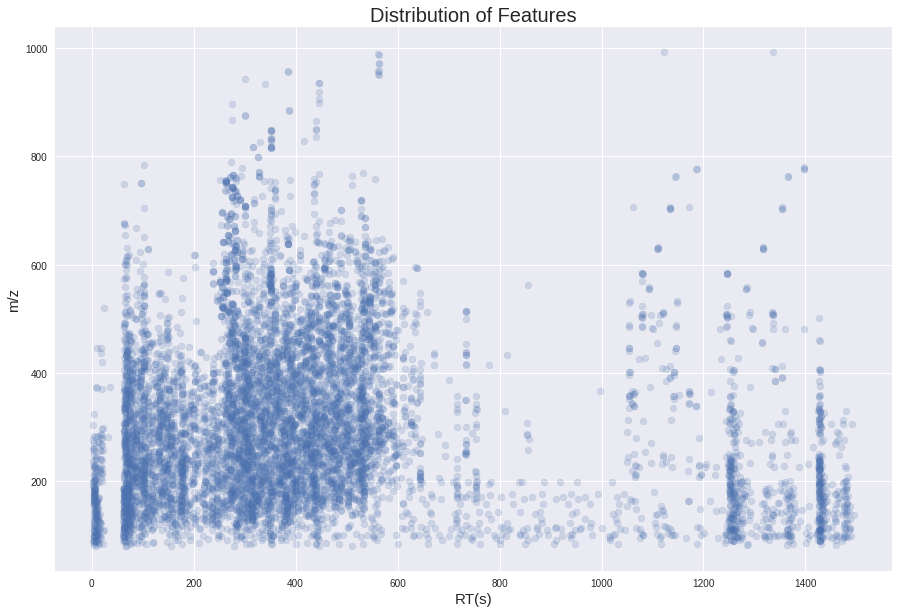

In [9]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
scatters = plt.scatter(fd['rt'], fd['mz'], alpha=.2)
ax = plt.gca()
ax.set_xlabel('RT(s)', fontsize=15)
ax.set_ylabel('m/z', fontsize=15)
ax.set_title('Distribution of Features', fontsize=20)
#plt.savefig('dist1.png')

In [10]:
scatters.get_facecolors()

array([[0.29803922, 0.44705882, 0.69019608, 0.2       ]])

# Filters

In [11]:
into.columns

Index(['F_index', 'Filter_01.mzXML', 'Filter_03.mzXML', 'Filter_05.mzXML',
       'Filter_075.mzXML', 'Filter_1.mzXML', 'Fiter_015.mzXML', 'QC_1_1.mzXML',
       'QC_1_2.mzXML', 'QC_1_3.mzXML', 'QC_2_1.mzXML', 'QC_2_2.mzXML',
       'QC_2_3.mzXML', 'QC_3_1.mzXML', 'QC_3_2.mzXML', 'QC_3_3.mzXML',
       'QC_4_1.mzXML', 'QC_4_2.mzXML', 'QC_4_3.mzXML', 'QC_5_1.mzXML',
       'QC_5_2.mzXML', 'QC_5_3.mzXML', 'Sample_1_1.mzXML', 'Sample_1_2.mzXML',
       'Sample_1_3.mzXML', 'Sample_2_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_2_3.mzXML', 'Sample_3_1.mzXML', 'Sample_3_2.mzXML',
       'Sample_3_3.mzXML', 'Sample_4_1.mzXML', 'Sample_4_2.mzXML',
       'Sample_4_3.mzXML', 'Sample_5_1.mzXML', 'Sample_5_2.mzXML',
       'Sample_5_3.mzXML'],
      dtype='object')

In [12]:
filters = into.iloc[:, 0:7]
filters = filters.iloc[:,[0,1,6,2,3,4,5]]
filters = filters.rename({'Filter_01.mzXML':  '0.10',
                          'Fiter_015.mzXML': '0.15',
                          'Filter_03.mzXML':  '0.30', 
                          'Filter_05.mzXML':  '0.50', 
                          'Filter_075.mzXML': '0.75',
                          'Filter_1.mzXML':   '1.00'}, 
                          axis=1)
filters.head()

,F_index,0.10,0.15,0.30,0.50,0.75,1.00
0,1,1.985377e+06,2.909245e+06,4.908377e+06,6.936050e+06,8.752023e+06,1.064056e+07
1,2,2.299344e+07,3.184920e+07,5.211685e+07,7.504573e+07,9.232607e+07,1.060672e+08
2,3,9.452991e+05,8.961250e+05,1.023743e+06,4.825853e+06,1.365038e+06,7.261568e+05
3,4,8.826248e+05,1.841079e+06,5.140370e+06,9.308512e+06,2.736374e+06,3.617496e+06
4,5,2.814078e+05,5.099740e+05,1.389269e+06,2.004741e+06,2.873223e+06,3.163359e+06


In [13]:
def get_R2(x):
    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    y_hat = x[1:] / x[-1]
    return r2_score(y_i, y_hat)

In [14]:
mp.cpu_count()

12

## Multiprocess apply

In [89]:
def deco(fun):
    def wrapper(*args, **kwargs):
        s = time.time()
        results = fun(*args, **kwargs)
        print(time.time()-s)
        return results
    return wrapper

def process(data, fun, axis):
    return data.apply(fun, axis)

def best_number_of_processes(data):
    import multiprocessing as mp
    
    CPUs = mp.cpu_count()
    rows = data.shape[0]
    if rows < 10:
        return 2
    elif rows < 100:
        return 4
    else:
        return CPUs
@deco
def multiprocessing_apply(data, fun, processes=None, axis=1):
    from multiprocessing import Pool
    from functools import partial
    
    if not processes:
        processes = best_number_of_processes(data)
        
    with Pool(processes=processes) as pool:
        if data.isnull().sum().sum():
            print("There are NA")
        
        data = np.array_split(data, processes)
        data = pool.map(partial(process, fun=fun, axis=axis), data)
        
        return pd.concat(data)

In [29]:
r2 = multiprocessing_apply(filters.dropna(), get_R2)

0.6659746170043945


0.6536271572113037


Text(0.5, 0, '$R^2$')

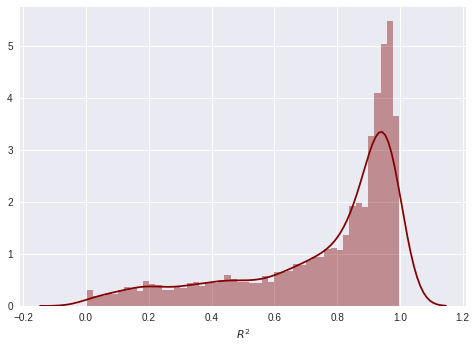

In [18]:
plt.style.use('seaborn')
r2 = multiprocessing_apply(filters.dropna(), get_R2)
sns.distplot(r2[r2>0], color='maroon', bins=50)
plt.xlabel('$R^2$')

In [19]:
test = filters.copy()

In [341]:
def subbin(nums):
    results = []
    N = len(nums)
    for i in range(2**N):
        pivot = bin(i)[2:][::-1]
        print(pivot)
        re = []
        for j in range(len(pivot)):
            if int(pivot[j]):
                re.append(nums[int(j)])
        results.append(re)
        
    return results

In [137]:
def subsets(nums):
    output = [[]]
    for i in range(len(nums)):
        for j in range(len(output)):
            output.append(output[j]+[nums[i]])
            
    return output

f = lambda x: len(x) >= 3

def get_R2_modify(x):
    if x.isnull().sum() > 3:
        return -1

    x = x.fillna(-1)[1:7]
    y_hat = x / x[-1]
    temp = y_hat
    y_hat = list(y_hat)
    
    y_i = [0.1, 0.15, 0.3, 0.5, 0.75, 1]
    pivot = 0
    for i in range(6):
        if x[i] == -1:
            y_hat.pop(i-pivot)
            y_i.pop(i-pivot)
            pivot += 1

    pivots = list(range(len(y_i)))
    subs = subsets(pivots)
    
    subs = list(filter(f, subs))
    y_i = np.array(y_i)
    y_hat = np.array(y_hat)

    d = {}
    for var, conc in zip(temp.values, temp.index):
        d[var] = conc  
    re = float('-inf')
    
    for sub in subs:
        p = r2_score(y_i[sub], y_hat[sub])
        if p > re:
            re = p
            indices = []
            for y in y_hat[sub]:
                indices.append(d[y])         
    return re, indices,        
    #return max(map(lambda index: r2_score(y_i[index], y_hat[index]), subs))

In [138]:
r2 = multiprocessing_apply(test, get_R2_modify)

There are NA
6.992000102996826


In [139]:
r2 = pd.DataFrame([r2.str[0], r2.str[1]]).T

In [140]:
r2[0] = r2[0].astype('float')

In [141]:
r2[r2[0] > .8][1].value_counts()

[0.10, 0.15, 1.00]    2084
[0.10, 0.75, 1.00]     685
[0.10, 0.30, 1.00]     386
[0.15, 0.30, 1.00]     361
[0.15, 0.75, 1.00]     348
[0.30, 0.75, 1.00]     272
[0.30, 0.50, 1.00]     259
[0.10, 0.50, 1.00]     243
[0.15, 0.50, 1.00]     233
[0.50, 0.75, 1.00]     190
Name: 1, dtype: int64

In [142]:
r2[r2[0] > .8].shape

(5061, 2)

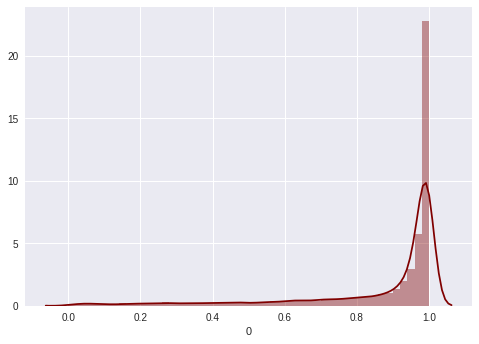

In [143]:
sns.distplot(r2[r2[0] > 0][0], color='maroon')

In [344]:
def subsets(nums):
    output = [[]]
    for i in range(len(nums)):
        for j in range(len(output)):
            output.append(output[j]+[nums[i]])
    return output

In [128]:
def first_drop(x):
    x = x.fillna(-1)
    x = x[1:7]
    pivot = True
    if x[3] == -1 or x[4] == -1 or x[5] == -1:
        return False
    for i in range(5,-1,-1):
        
        if pivot:
            if x[i] == -1:
                pivot = False
        else:
            if not x[i] == -1:
                return False
    
    return True

In [129]:
def get_R2_modify(x):
    x = x.fillna(-1)
    x = x[1:7]

    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    
    y_hat = x / x[-1]
    
    pivot = 0
    for i in range(6):
        if not  x[i] == -1:
            pivot = i
            break
           
    y_i = y_i[pivot:]
    y_hat = y_hat[pivot:]
    return r2_score(y_i, y_hat)

In [132]:
test2 = filters.copy()
test2['normal'] = test2.apply(first_drop, axis=1)
print(test2.shape)
test2 = test2[test2['normal'] == True]
print(test2.shape)
test2['R2'] = test2.apply(get_R2_modify, axis=1)
test2[test2['R2'] > .8].shape

(8679, 8)
(8084, 8)


(2472, 9)

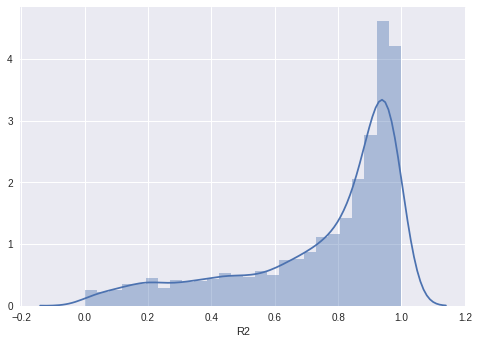

In [135]:
sns.distplot(test2[test2['R2']>0]['R2'])

In [145]:
index2 = test2[test2['R2'] > .8].index

In [144]:
index1 = r2[r2[0] > .8].index

In [149]:
index2.shape, index1.shape

((2472,), (5061,))

In [148]:
(index1 ^ index2).shape

(2589,)

In [153]:
(index1 | index2).shape

(5061,)

In [154]:
(index1 & index2).shape

(2472,)

In [150]:
2589+2472

5061

In [151]:
(index2 ^ index1).shape

(2589,)

In [158]:
fd['R2'] = r2[0]

In [160]:
fd['pass'] = fd['R2'] > .8

In [168]:
fd[~fd['pass']]['mz'].shape

(3618,)

In [252]:
r2[1].value_counts()

[0.10, 0.15, 1.00]    2434
[0.10, 0.75, 1.00]    1726
[0.50, 0.75, 1.00]     820
[0.30, 0.75, 1.00]     623
[0.15, 0.75, 1.00]     612
[0.10, 0.30, 1.00]     507
[0.15, 0.30, 1.00]     438
[0.30, 0.50, 1.00]     429
[0.10, 0.50, 1.00]     383
[0.15, 0.50, 1.00]     329
[0.10, 0.15, 0.30]     190
[0.10, 0.15, 0.75]      33
[0.10, 0.50, 0.75]      28
[0.10, 0.15, 0.50]      19
[0.10, 0.30, 0.75]      16
[0.15, 0.50, 0.75]      14
[0.10, 0.30, 0.50]      12
[0.30, 0.50, 0.75]      11
[0.15, 0.30, 0.50]       4
[0.15, 0.30, 0.75]       3
Name: 1, dtype: int64

In [283]:
r2[r2[0] > .8][1].value_counts()

[0.10, 0.15, 1.00]    2084
[0.10, 0.75, 1.00]     685
[0.10, 0.30, 1.00]     386
[0.15, 0.30, 1.00]     361
[0.15, 0.75, 1.00]     348
[0.30, 0.75, 1.00]     272
[0.30, 0.50, 1.00]     259
[0.10, 0.50, 1.00]     243
[0.15, 0.50, 1.00]     233
[0.50, 0.75, 1.00]     190
Name: 1, dtype: int64

In [6]:
plt.style.available

['seaborn',
 'seaborn-muted',
 'seaborn-paper',
 '_classic_test',
 'seaborn-notebook',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-deep',
 'fast',
 'bmh',
 'Solarize_Light2',
 'ggplot',
 'tableau-colorblind10',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'classic',
 'seaborn-white',
 'grayscale']

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

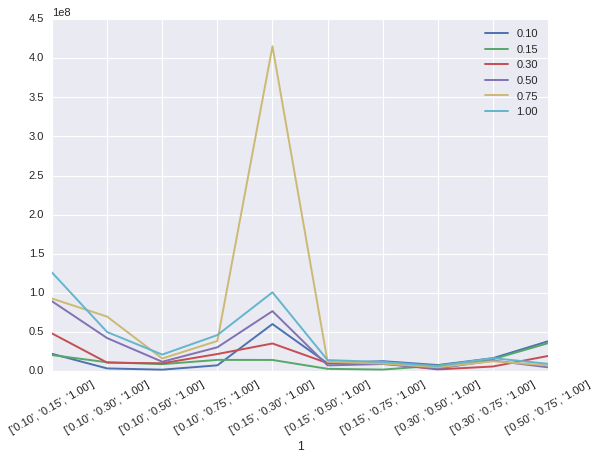

In [22]:
t = pd.concat([filters.iloc[:, 1:], r2], axis=1)
t[1] = t.apply(lambda x: str(x[1]), axis=1)
t[t[0]> .8].groupby(1).mean().iloc[:, :-1].plot()
plt.xticks(rotation=30)

In [56]:
t[t[0]>.8][1].value_counts()

['0.10', '0.15', '1.00']    2084
['0.10', '0.75', '1.00']     685
['0.10', '0.30', '1.00']     386
['0.15', '0.30', '1.00']     361
['0.15', '0.75', '1.00']     348
['0.30', '0.75', '1.00']     272
['0.30', '0.50', '1.00']     259
['0.10', '0.50', '1.00']     243
['0.15', '0.50', '1.00']     233
['0.50', '0.75', '1.00']     190
Name: 1, dtype: int64

In [67]:
t[t[0]> .8].groupby(1).mean().iloc[:, :-1].astype('int').reindex(t[t[0]>.8][1].value_counts().index).transform(lambda x: np.log(x))

,0.10,0.15,0.30,0.50,0.75,1.00
"['0.10', '0.15', '1.00']",16.908557,16.832907,17.688772,18.306716,18.344667,18.651755
"['0.10', '0.75', '1.00']",15.810175,16.475532,16.896591,17.229516,17.464994,17.644109
"['0.10', '0.30', '1.00']",15.035655,16.235500,16.196405,17.557306,18.058382,17.725758
"['0.15', '0.30', '1.00']",17.911581,16.468822,17.378398,18.154166,19.844275,18.427317
"['0.15', '0.75', '1.00']",16.355019,14.452920,16.096341,16.013757,16.075901,16.275193
"['0.30', '0.75', '1.00']",16.616545,16.538407,15.580601,16.415802,16.341372,16.621905
"['0.30', '0.50', '1.00']",15.855855,15.778061,14.567756,15.014551,15.395922,15.671098
"['0.10', '0.50', '1.00']",14.395589,15.993556,16.111408,16.292813,16.592896,16.864093
"['0.15', '0.50', '1.00']",16.103591,14.867127,16.132722,15.799306,16.284312,16.456603
"['0.50', '0.75', '1.00']",17.455583,17.388233,16.776459,15.387226,15.789001,16.047694


In [61]:
t[t[0]> .8].groupby(1).mean().iloc[:, :-1].astype('int').reindex(t[t[0]>.8][1].value_counts().index)

,0.10,0.15,0.30,0.50,0.75,1.00
"['0.10', '0.15', '1.00']",22044132,20438003,48099022,89228977,92680303,125995287
"['0.10', '0.75', '1.00']",7349733,14296598,21781932,30386698,38454815,45998024
"['0.10', '0.30', '1.00']",3387676,11245744,10814573,42173625,69607444,49911303
"['0.15', '0.30', '1.00']",60103628,14200991,35264867,76604486,415201575,100665861
"['0.15', '0.75', '1.00']",12673446,1891574,9784805,9009199,9586827,11701095
"['0.30', '0.75', '1.00']",16461667,15224351,5842098,13467663,12501660,16550140
"['0.30', '0.50', '1.00']",7693261,7117458,2121758,3316931,4856954,6395456
"['0.10', '0.50', '1.00']",1786178,8829034,9933350,11909101,16076930,21085439
"['0.15', '0.50', '1.00']",9855996,2862273,10147338,7270285,11808286,14028522
"['0.50', '0.75', '1.00']",38094615,35613418,19316286,4814903,7195749,9320195


[]

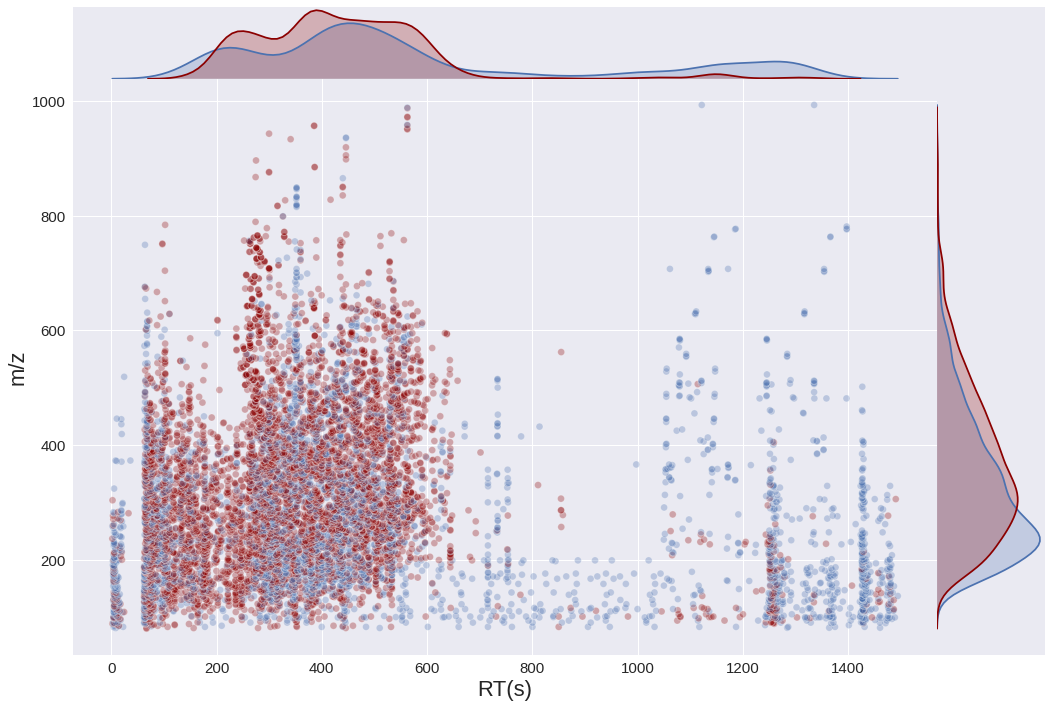

In [226]:
plt.figure(figsize=(15,10))
ax1 = plt.axes([0.9, 0.1, 0.1, .8])
sns.kdeplot(fd[~fd['pass']]['mz'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], vertical=True, ax=ax1)
sns.kdeplot(fd[fd['pass']]['mz'], shade=True, color='darkred', vertical=True, ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend('')

ax2 = plt.axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot('rt', 'mz', hue='pass', data=fd, alpha=.3, 
                palette=[[0.29803922, 0.44705882, 0.69019608],'darkred'], 
                edgecolor='w', ax=ax2,
                legend=False)
ax2.set_xlabel('RT(s)', fontsize=22)
ax2.set_ylabel('m/z', fontsize=22)
ax2.tick_params(labelsize=15)

'''top = 900
left = 920
ax2.text(left+40, top, 'Not passed', fontsize=25)
ax2.text(left+40, top-60, 'Passed', fontsize=25)
ax2.scatter(left, top+15, c=[[0.29803922, 0.44705882, 0.69019608]], s=300)
ax2.scatter(left, top-45, c='darkred', s=300)'''

ax3 = plt.axes([0.1, 0.9, 0.8, 0.1])
sns.kdeplot(fd[~fd['pass']]['rt'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], ax=ax3)
sns.kdeplot(fd[fd['pass']]['rt'], shade=True, color='darkred', ax=ax3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel('')
ax3.legend('')

ax4 = plt.axes([0.9, 0.9, 0.1, 0.1])
ax4.set_xticks([])
ax4.set_yticks([]) 

#plt.savefig('distribution.png')

# Order of Sample Sequence

In [300]:
snames = ['QC 2-3', 'QC 1-1', 'QC 2-2', 'QC 4-2', 'QC 1-3', 'QC 5-2', 'QC 5-1', 'QC 2-1', 
         'Sample 4-2', 'Filter 0.3', 'Sample 1-2', 'QC 3-1',
         'Sample 5-2', 'Sample 3-2', 'Sample 1-3', 'QC 1-2',
         'Sample 5-1', 'Sample 2-2', 'Sample 5-3', 'QC 5-3',
         'Filter 0.75', 'Sample 3-3', 'Sample 4-1', 'QC 3-3',
         'Filter 1.0', 'Sample 2-3', 'Sample 4-3', 'QC 3-2', 
         'Filter 0.1', 'Filter 0.5', 'Sample 1-1', 'QC 4-3', 
         'Sample 2-1', 'Filter 0.15', 'Sample 3-1', 'QC 4-1']

In [40]:
snames_df = pd.DataFrame(snames, columns=['Sname'])

In [41]:
def classify(x):
    return x[0][:2]

In [42]:
snames_df['Class'] = snames_df.apply(classify, axis=1)
snames_df.head()

,Sname,Class
0,QC 2-3,QC
1,QC 1-1,QC
2,QC 2-2,QC
3,QC 4-2,QC
4,QC 1-3,QC


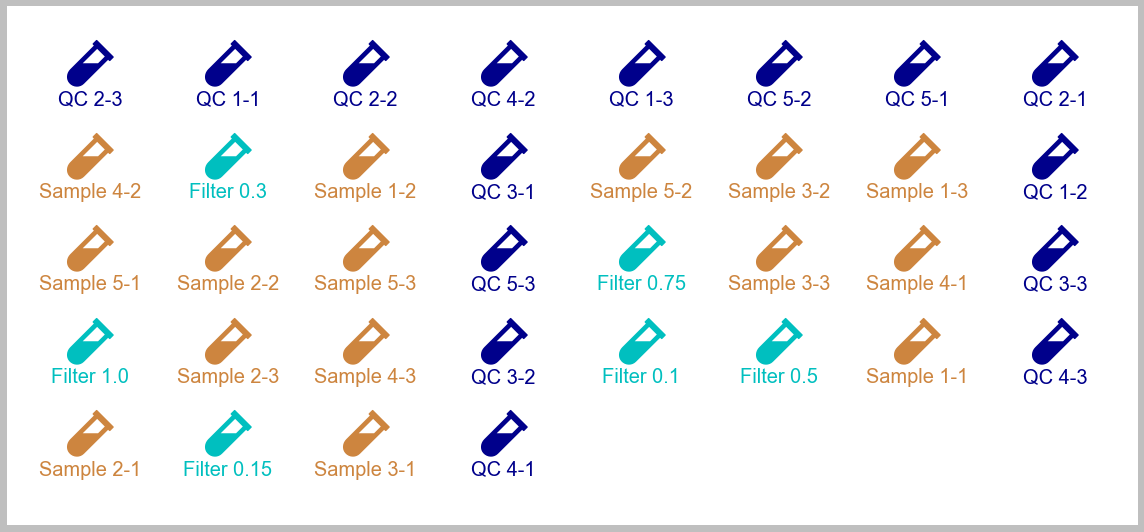

In [43]:
fp1 = FontProperties(fname="../fontawesome-free-5.7.2-desktop/otfs/Font Awesome 5 Free-Solid-900.otf")

cmap = dict(QC='darkblue', Sa='peru', Fi='c')

plt.style.use(plt.style.available[6])

plt.figure(figsize=(16,7.5))

ax=plt.gca()

for i in range(snames_df.shape[0]):
    x = (i % 8)*2.5 + 1.5
    y = -(i // 8)
    cls = snames_df.iloc[i,1]
    sname = snames_df.iloc[i,0]
    ax.text(x, y, '\uf492', fontproperties=fp1, size=50, color=cmap[cls],
           ha='center', va='center')
    ax.text(x, y-0.4, sname, size=20, color=cmap[cls],
           ha='center', va='center')
ax.set_xlim(0,20.5)
ax.set_ylim(-5,0.6)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('Injection sequence.png')

In [44]:
QCs_eq = into.iloc[:, [12, 7, 11, 17, 9, 20, 19, 10]]
QCs_nor = into.iloc[:, [13, 8, 21, 15, 14, 18, 16]]

In [45]:
Samples = into.iloc[:, 22:]
Samples_ordered = Samples.iloc[:, [10, 1, 13, 7, 2, 12, 4, 14, 8, 9, 5, 11, 0, 3, 6]]

In [46]:
noise_index, pass_index, pass_modified_index = f_not_pass_true.index, f_pass.index, f_modified.index

In [47]:
int(np.log10(9.7e6))

6

In [55]:
def RSD(x):
    return int(np.log10(np.mean(x))), np.std(x) / np.mean(x)

In [49]:
(pass_index | pass_modified_index).shape

(2385,)

In [57]:
check = QCs_nor.loc[pass_index | pass_modified_index].dropna()

In [51]:
check['mag'], check['RSD'] = check.apply(RSD, axis=1).str

In [52]:
check.sort_values(by='mag', ascending=False)

,QC_3_1.mzXML,QC_1_2.mzXML,QC_5_3.mzXML,QC_3_3.mzXML,QC_3_2.mzXML,QC_4_3.mzXML,QC_4_1.mzXML,mag,RSD
4847,2.616341e+09,2.464244e+09,2.331613e+09,2.084946e+09,2.436210e+09,2.928084e+09,2.247839e+09,9,0.103103
1828,4.520577e+09,4.681678e+09,4.275207e+09,4.284365e+09,4.316533e+09,4.709174e+09,4.396949e+09,9,0.038346
4342,3.159162e+09,3.355066e+09,3.120329e+09,2.884269e+09,2.941343e+09,3.368126e+09,3.160087e+09,9,0.054387
3101,1.258405e+09,1.387141e+09,1.297383e+09,1.181773e+09,1.223514e+09,1.386891e+09,1.287321e+09,9,0.055646
3349,1.019873e+09,1.110990e+09,1.031606e+09,8.966371e+08,9.468425e+08,1.084719e+09,9.813254e+08,9,0.068992
3024,1.496343e+09,1.385190e+09,1.590945e+09,1.651905e+09,1.170487e+09,1.338882e+09,1.292511e+09,9,0.111535
3541,1.144617e+08,1.276080e+08,1.175738e+08,1.006088e+08,1.078686e+08,1.230644e+08,1.115949e+08,8,0.073678
3102,1.045682e+08,1.100738e+08,1.086241e+08,9.067999e+07,9.657736e+07,1.133505e+08,1.055371e+08,8,0.070766
484,2.216942e+08,2.341714e+08,2.141932e+08,1.985891e+08,2.043675e+08,2.290923e+08,2.037794e+08,8,0.058792
525,1.334500e+08,1.423028e+08,1.322586e+08,1.233827e+08,1.312024e+08,1.435485e+08,1.334769e+08,8,0.047443


In [53]:
check[check['mag'] >= 7].shape

(340, 9)

In [54]:
check[check['RSD'] <= 0.2].shape

(1468, 9)

In [55]:
check_not = QCs_nor.loc[noise_index].dropna()
check_not['mag'], check_not['RSD'] = check_not.apply(RSD, axis=1).str
check_not.sort_values(by='mag', ascending=False)

,QC_3_1.mzXML,QC_1_2.mzXML,QC_5_3.mzXML,QC_3_3.mzXML,QC_3_2.mzXML,QC_4_3.mzXML,QC_4_1.mzXML,mag,RSD
219,2.482474e+10,1.053159e+09,1.418810e+06,5.338312e+08,4.001398e+10,5.136604e+10,2.902307e+10,10,0.922467
213,8.168870e+09,1.157232e+11,3.930756e+09,5.311983e+07,3.969536e+09,5.777084e+08,1.618764e+09,10,2.063189
222,1.458473e+11,6.202338e+07,2.473717e+10,8.777547e+10,3.111406e+10,5.784494e+10,1.763454e+11,10,0.811681
224,3.042115e+10,2.181142e+10,1.160619e+10,7.143028e+10,9.350153e+09,3.569692e+10,9.768027e+09,10,0.753879
380,8.225581e+08,6.195216e+08,9.936617e+08,9.070227e+08,1.442356e+09,1.623191e+09,7.443053e+08,9,0.337204
63,1.931146e+09,3.763723e+06,1.801845e+09,3.533553e+06,1.768689e+09,9.995257e+06,1.787780e+09,9,0.862487
1905,5.515261e+08,1.083685e+10,2.174858e+08,9.379947e+09,4.226671e+08,8.504430e+06,2.794523e+08,9,1.436567
1904,1.186749e+10,3.111155e+08,1.051902e+10,1.563844e+07,9.844937e+09,2.732767e+08,1.002484e+10,9,0.843538
1192,1.015649e+10,1.717581e+08,9.045600e+09,1.130981e+08,8.278393e+09,1.876745e+08,3.043105e+06,9,1.127514
1540,1.048888e+09,1.031423e+09,1.031649e+09,1.058208e+09,1.053275e+09,1.002567e+09,9.888576e+08,9,0.023597


In [56]:
check_not[check_not['RSD'] <= 0.2].shape

(2278, 9)

In [57]:
check_not.shape

(5376, 9)

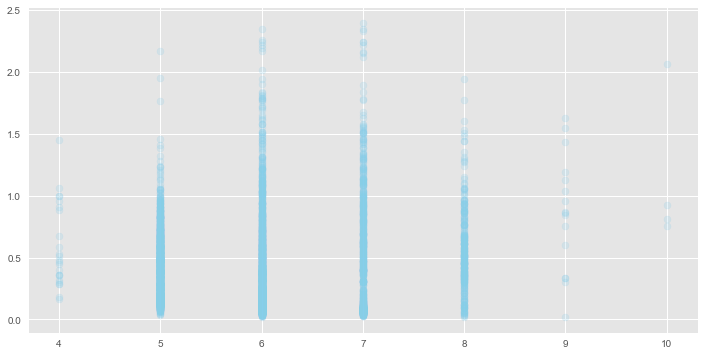

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.scatter(check_not['mag'], check_not['RSD'], alpha=.2, c='skyblue')

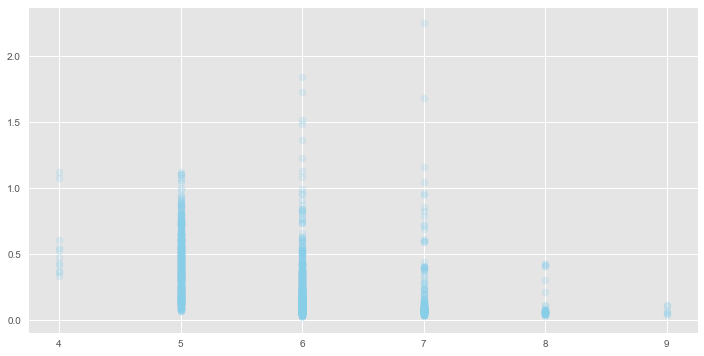

In [62]:
plt.figure(figsize=(12, 6))
plt.scatter(check['mag'], check['RSD'], alpha=.2, c='skyblue')

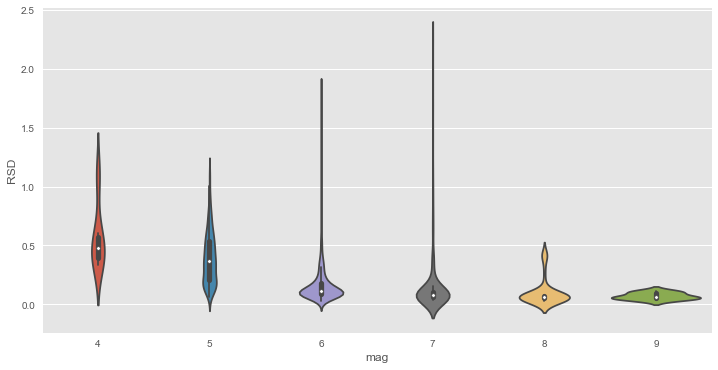

In [63]:
plt.figure(figsize=(12,6))
sns.violinplot(x='mag', y='RSD', data=check)

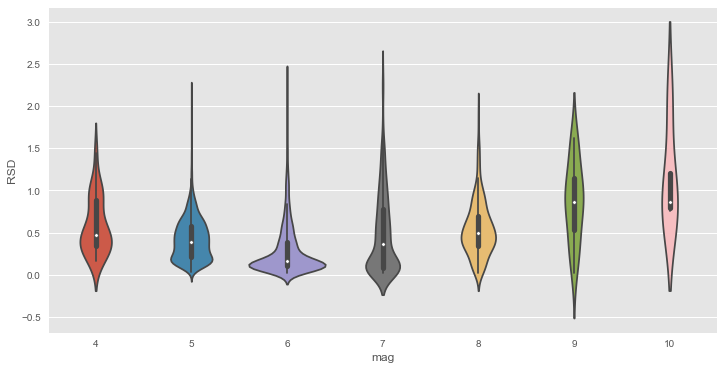

In [64]:
plt.figure(figsize=(12,6))
sns.violinplot(x='mag', y='RSD', data=check_not)

In [65]:
check_not[check_not['mag'] == 9].RSD.sort_values()

1540    0.023597
226     0.299747
338     0.336856
380     0.337204
228     0.599868
225     0.752631
1904    0.843538
63      0.862487
364     0.869010
227     0.960373
354     1.035103
1192    1.127514
239     1.194453
1905    1.436567
220     1.550886
342     1.627020
Name: RSD, dtype: float64

In [66]:
dill.dump_session('p.pyData')

# Peak Figure 3D

In [4]:
filters.columns

Index(['F_index', '0.10', '0.15', '0.30', '0.50', '0.75', '1.00', 'R2'], dtype='object')

In [36]:
conc = '0.30'

In [37]:
threeD = pd.merge(fd, filters, on='F_index').loc[:,['mzmed', 'rtmed', conc]].dropna()

mzmin, mzmax = threeD['mzmed'].min(), threeD['mzmed'].max()

mzmin = round(mzmin)
mzmax = round(mzmax)

rt_range = np.arange(1, 1501, 1500/500)
mz_range = np.arange(mzmin, mzmax, (mzmax-mzmin)/500)

threeD['RT'] = pd.cut(threeD['rtmed'], bins=500, labels=rt_range)
threeD['mz'] = pd.cut(threeD['mzmed'], bins=500, labels=mz_range)

threeD = threeD[[conc, 'RT', 'mz']]

x = rt_range
y = mz_range
x, y = np.meshgrid(x, y)

mat = threeD.groupby(['RT', 'mz']).mean()

mat = mat.unstack().fillna(1).T

z = mat.values.ravel().reshape(500,500)

z = np.log(z)

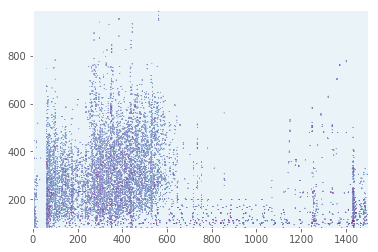

In [38]:
plt.contourf(x, y, z, cmap=plt.cm.BuPu)

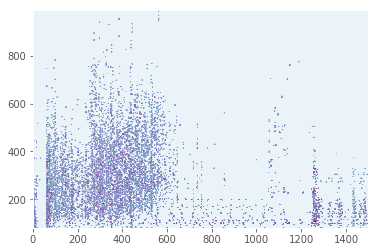

In [32]:
plt.contourf(x, y, z, cmap=plt.cm.BuPu)

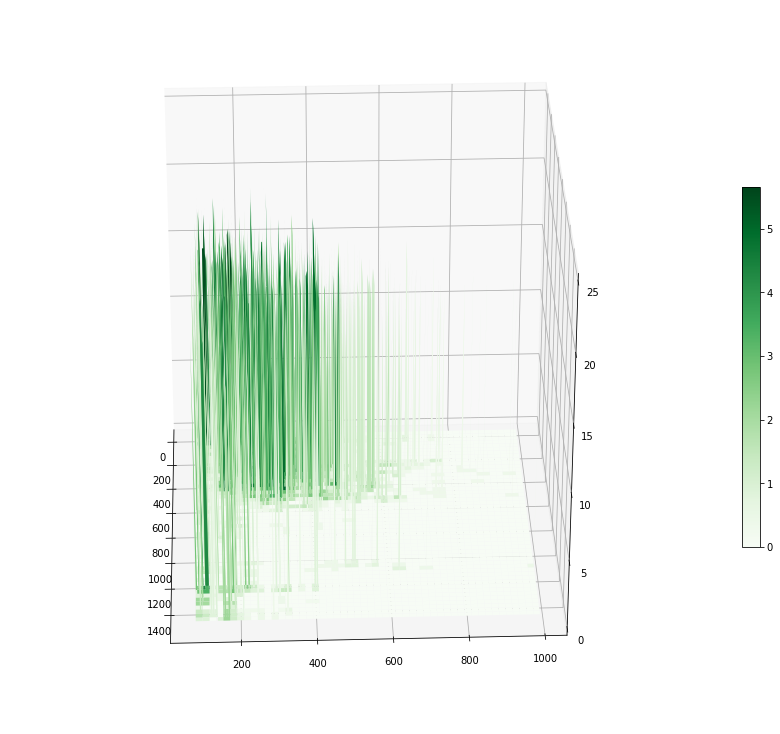

In [45]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, cmap=plt.cm.Greens, 
                       rstride=10, cstride=10, 
                      edgecolor=None, linewidth=0)

fig.colorbar(surf, shrink=.5)

os.system('mkdir peak3D')
for angle in range(0, 360, 2):
    ax.view_init(30, angle)
    plt.savefig('peak3D/peak_%.3d.png' % angle)
os.system('magick -delay 10 -loop 0 peak3D//peak_*.png peak3D.gif')

0

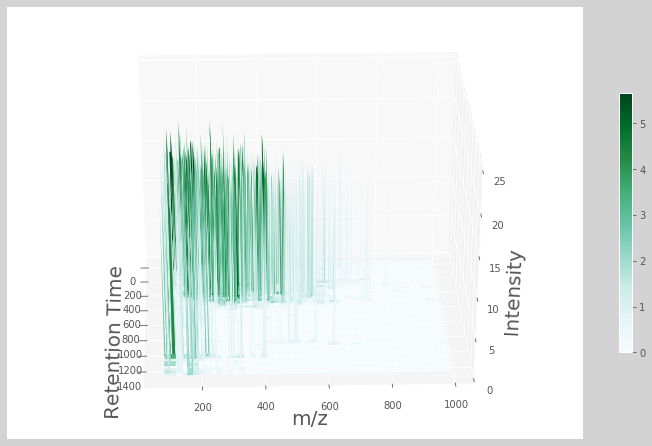

In [4]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, 
                       cmap=plt.cm.BuGn, 
                       rstride=10, cstride=10,
                      edgecolor=None, linewidth=0)
fig.set_facecolor('lightgrey')
fig.colorbar(surf, shrink=.6)
ax.set_facecolor('w')

os.system('mkdir peak3D_v1.1')
for angle in range(0, 360, 2):
    ax.view_init(30, angle)
    ax.set_xlabel('Retention Time', fontsize=20)
    ax.set_ylabel('m/z', fontsize=20)
    ax.set_zlabel('Intensity', fontsize=20)
    
    fig.savefig('peak3D_v1.1/peak_%.3d.png' % angle)

os.system('magick -delay 10 -loop 0 peak3D_v1.1//peak_*.png peak3D_v1.1.gif')

In [21]:
dill.dump_session('2_17.pyData')

In [159]:
peaktable = pd.read_csv('cp_centroid.csv').rename({'Unnamed: 0':'Peak_index'}, axis=1)

peaktable = peaktable[peaktable['sample'] == 5]

peaktable = peaktable[['mz', 'rt', 'into']]

peaktable.isnull().sum()

mz      0
rt      0
into    0
dtype: int64

In [155]:
bins_rt = 1000
bins_mz = 500

rts = np.arange(peaktable['rt'].min(), peaktable['rt'].max(), (peaktable['rt'].max()-peaktable['rt'].min())/bins_rt)
mzs = np.arange(peaktable['mz'].min(), peaktable['mz'].max(), (peaktable['mz'].max()-peaktable['mz'].min())/bins_mz)

peaktable['rt'] = pd.cut(peaktable['rt'], bins_rt)
peaktable['mz'] = pd.cut(peaktable['mz'], bins_mz)

In [156]:
def get_med(x):
    return x[0].right, x[1].right

In [157]:
peaktable['mz'], peaktable['rt'] = peaktable.apply(get_med, axis=1).str

In [158]:
raw_mat = peaktable.groupby(['rt','mz']).mean()
raw_mat = raw_mat.unstack()
raw_mat = raw_mat.fillna(1)

In [150]:
raw_mat.shape

(844, 452)

In [151]:
rt0 = peaktable['rt'].sort_values().unique()
mz0 = peaktable['mz'].sort_values().unique()
rt0, mz0 = np.meshgrid(rt0, mz0)
z0 = raw_mat.values.ravel().reshape(844,452).T
z0 = np.log(z0)

In [152]:
rt0.shape, mz0.shape, z0.shape

((452, 844), (452, 844), (452, 844))

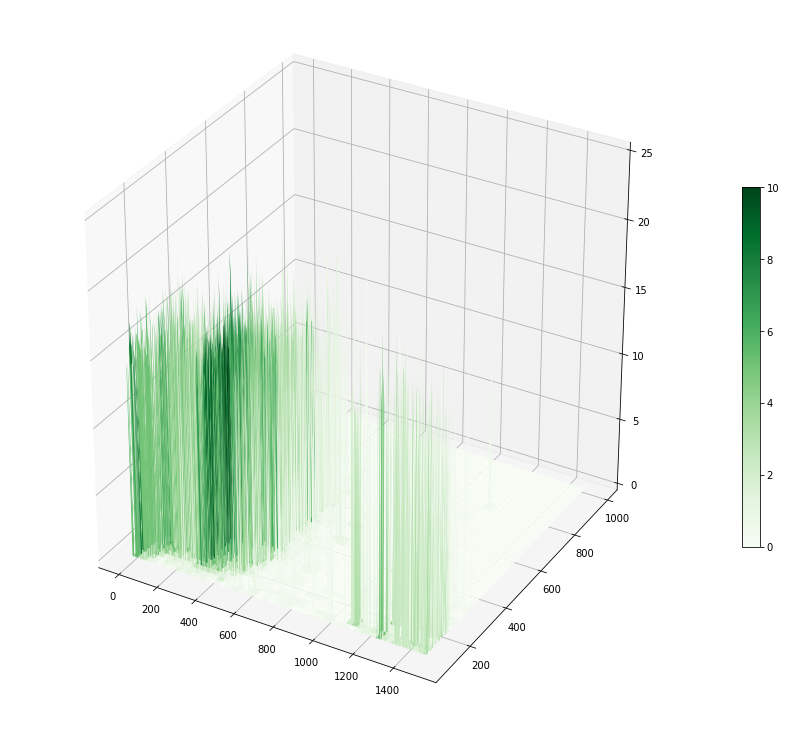

In [153]:
fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig)

surf = ax.plot_surface(rt0, mz0, z0, cmap=plt.cm.Greens, 
                       #rstride=1, cstride=1, 
                      #edgecolor=None, linewidth=0
                      )

fig.colorbar(surf, shrink=.5)

# QC

* **DataSets:** QCs_eq, QCs_nor, Samples, Samples_ordered
* **Indexes:**noise_index, pass_index, pass_modified_index
* **Fun:** RSD( return 'mag' and 'RSD')

In [8]:
def RSD_modified(x):
    return int(np.log10(np.mean(x))), np.mean(x), np.std(x, ddof=1) / np.mean(x)   

In [9]:
plt.style.use('seaborn')

In [386]:
QCs_total = QCs_nor.dropna()
QCs_pass = QCs_nor.loc[pass_index | pass_modified_index].dropna()
QCs_noise = QCs_nor.loc[noise_index].dropna()

QCs_total['mag'], QCs_total['mean'], QCs_total['RSD'] = QCs_total.apply(RSD_modified, axis=1).str
QCs_pass['mag'], QCs_pass['mean'], QCs_pass['RSD'] = QCs_pass.apply(RSD_modified, axis=1).str
QCs_noise['mag'], QCs_noise['mean'], QCs_noise['RSD'] = QCs_noise.apply(RSD_modified, axis=1).str

QCs_total.shape, QCs_pass.shape, QCs_noise.shape

C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


((7661, 10), (2285, 10), (5376, 10))

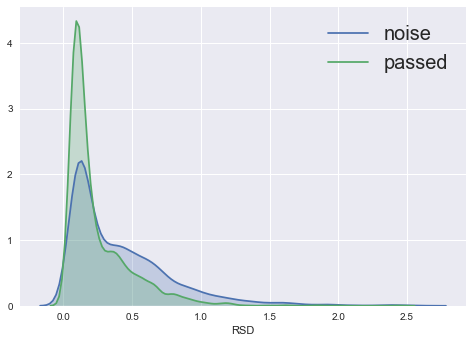

In [97]:
sns.distplot(QCs_noise['RSD'], label='noise', hist=False, kde_kws={'shade':'True'})
sns.distplot(QCs_pass['RSD'], label='passed', hist=False, kde_kws={'shade':'True'})
plt.legend(fontsize=20)
ax= plt.gca()
#ax.set_xlim(-.2,1)

In [13]:
QCs_noise[QCs_noise['RSD'] < .2].shape[0]

2164

In [14]:
QCs_pass[QCs_pass['RSD'] < .2].shape[0]

1410

([], <a list of 0 Text yticklabel objects>)

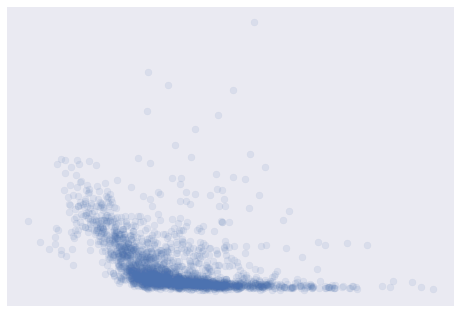

In [160]:
plt.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.1)
plt.xticks([])
plt.yticks([])
plt.title('')

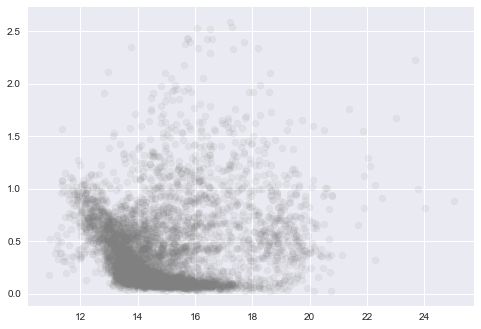

In [16]:
plt.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.1, c='grey')

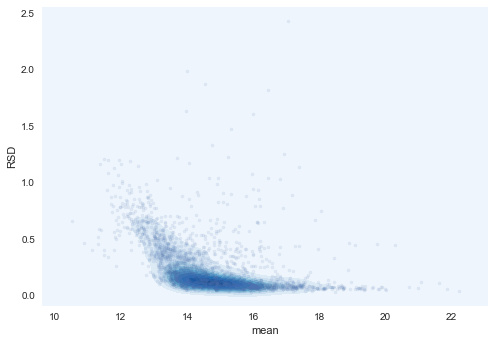

In [38]:
sns.kdeplot(np.log(QCs_pass['mean']), QCs_pass['RSD'], shade=True, cmap=plt.cm.Blues)
ax = plt.gca()
ax.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.1, s=10)

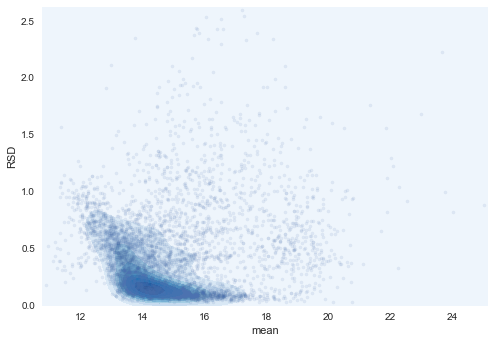

In [64]:
sns.kdeplot(np.log(QCs_noise['mean']), QCs_noise['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5)
ax = plt.gca()
ax.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.1, s=10)

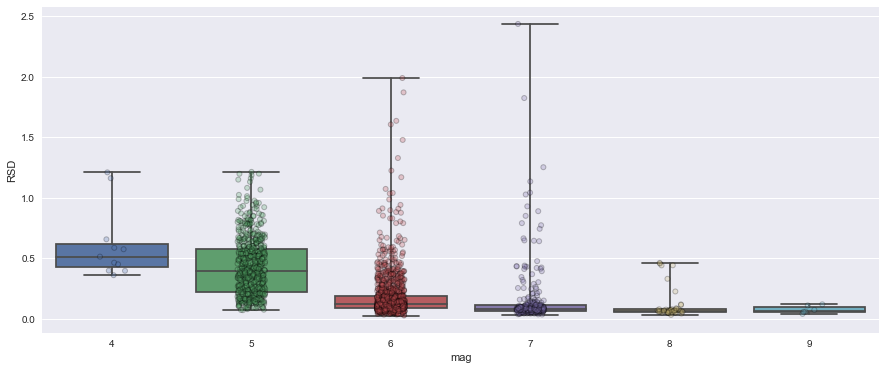

In [167]:
plt.figure(figsize=(15,6))
sns.boxplot('mag', 'RSD', data=QCs_pass, whis=np.inf)
sns.stripplot('mag', 'RSD', data=QCs_pass, jitter=True, edgecolor='k', linewidth=1, alpha=.25, dodge=True)
plt.savefig('box_strip.png')

In [161]:
QCs_noise.shape

(5376, 10)

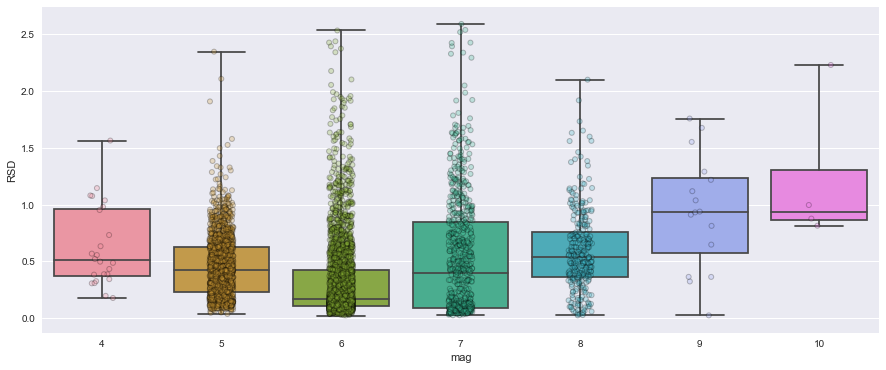

In [166]:
plt.figure(figsize=(15,6))
sns.boxplot('mag', 'RSD', data=QCs_noise, whis=np.inf)
sns.stripplot('mag', 'RSD', data=QCs_noise, jitter=True, edgecolor='k', linewidth=1, alpha=.25, dodge=True)
plt.savefig('box_strip_noise.png')

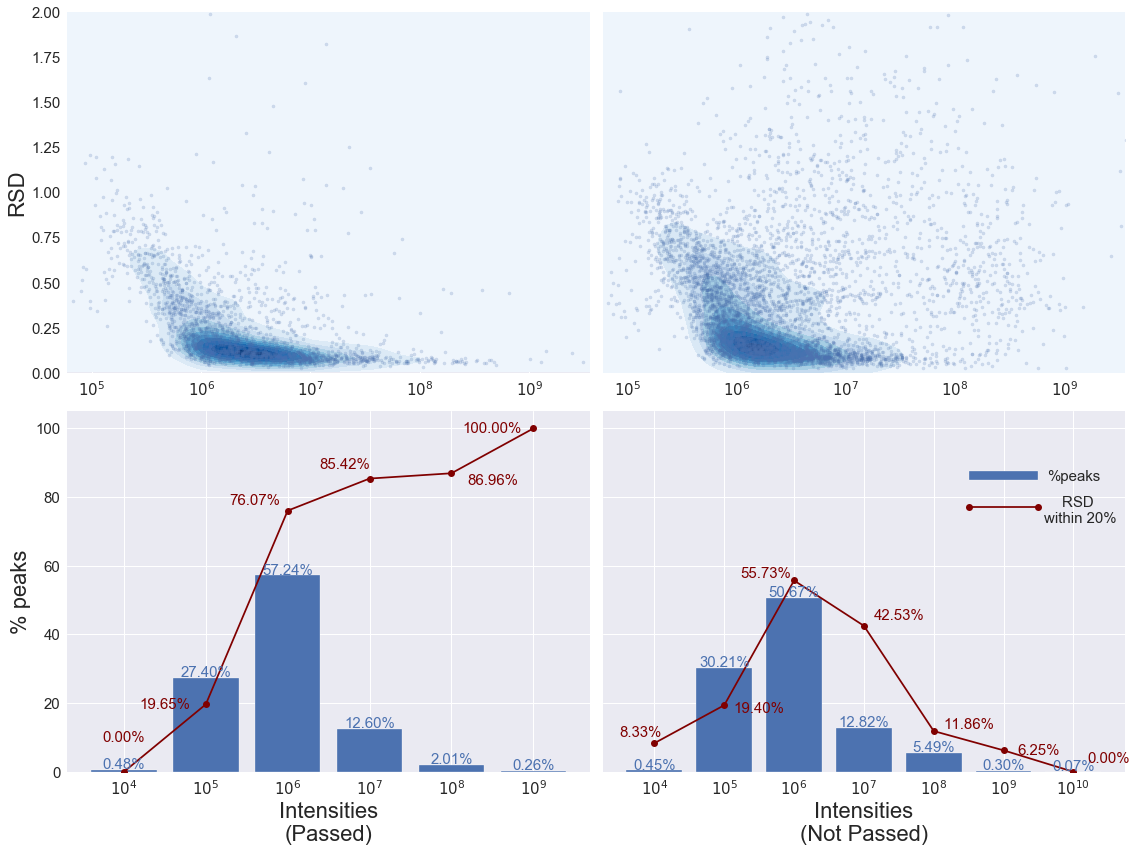

In [302]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.kdeplot(np.log(QCs_pass['mean']), QCs_pass['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5, ax=ax1)
ax1.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.2, s=10)

sns.kdeplot(np.log(QCs_noise['mean']), QCs_noise['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5, ax=ax2)
ax2.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.2, s=10)

for i, ax in enumerate([ax1, ax2]):
    ax.set_xticks(np.log([1e5, 1e6, 1e7, 1e8, 1e9]))
    ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'], fontsize=15)
    ax.set_xlim(11, 22)
    ax.set_ylim(0,2)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_ylabel('RSD', fontsize=22)
    ax.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels([])
# ax3
n_peaks_pass = QCs_pass.groupby('mag').aggregate('count').values.T[0] / QCs_pass.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
bars = ax3.bar(np.arange(6), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(6):
    ax3.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(6):
    per = QCs_pass[(QCs_pass['RSD'] <.2) & (QCs_pass['mag'] == i+4)].shape[0]
    per = per / QCs_pass.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
ax3.plot(np.arange(6), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[0,10], [-.5,0], [-.4,3], [-.3,4], [.5,-2], [-.5,0]]
for i in range(6):
    ax3.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax3.set_xticks(np.arange(6))
ax3.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'], fontsize=15)
ax3.set_ylim(0, 105)

# ax4
n_peaks_noise = QCs_noise.groupby('mag').aggregate('count').values.T[0] / QCs_noise.shape[0] *100
n_peaks_noise = np.round(n_peaks_noise, 2)
percent_noise = []
length = len(n_peaks_noise)

for n in n_peaks_noise:
    percent_noise.append('%.2f%%' % n)
    
bars = plt.bar(np.arange(length), n_peaks_noise, alpha=1)
c = bars[0].get_facecolor()
for i in range(length):
    plt.text(i, n_peaks_noise[i]+1.5, percent_noise[i], color=c[:3], ha='center', va='center', fontsize=15)
    
noise_02 = []
for i in range(length):
    per = QCs_noise[(QCs_noise['RSD'] <.2) & (QCs_noise['mag'] == i+4)].shape[0]
    per = per / QCs_noise.groupby('mag').aggregate('count').values.T[0][i] * 100
    noise_02.append(per)
    
plt.plot(np.arange(length), noise_02, c='maroon', marker='o')

noise_02_str = []
for per in noise_02:
    noise_02_str.append('%.2f%%' % per)

loc_off = [[-.2,3], [.5,-1], [-.4,2], [.5,3], [.5,2], [.5,0], [0.5,4]]
for i in range(length):
    plt.text(i+loc_off[i][0], noise_02[i]+loc_off[i][1], noise_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')

ax4.set_xticks(np.arange(length))
ax4.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$', '$10^{10}$'], fontsize=15)

for i, ax in enumerate([ax3, ax4]):
    ax.set_ylabel('% peaks', fontsize=22)
    ax.yaxis.set_tick_params(labelsize=15)
    labels = ['(Passed)', '(Not Passed)']
    ax.set_xlabel('Intensities\n%s' % labels[i], fontsize=22)
    

rect = Rectangle((4.5, 85), 1, 2.5)
ax4.add_patch(rect)
ax4.text(6, 86, '%peaks', ha='center', va='center', fontsize=15)
line = Line2D([4.5, 5.5], [77, 77], color='maroon', marker='o')
ax4.text(6.1, 76, 'RSD \nwithin 20%', ha='center', va='center', fontsize=15)
ax4.add_line(line)
ax4.set_ylabel('')
ax4.set_yticklabels([])
ax4.set_ylim(0,105)

plt.tight_layout()
plt.savefig('compare.png')

(0, 100)

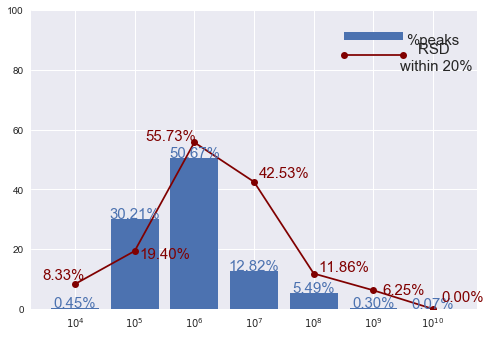

In [9]:
n_peaks_pass = QCs_noise.groupby('mag').aggregate('count').values.T[0] / QCs_noise.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
length = len(n_peaks_pass)

for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
    
bars = plt.bar(np.arange(length), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(length):
    plt.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(length):
    per = QCs_noise[(QCs_noise['RSD'] <.2) & (QCs_noise['mag'] == i+4)].shape[0]
    per = per / QCs_noise.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
plt.plot(np.arange(length), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[-.2,3], [.5,-1], [-.4,2], [.5,3], [.5,2], [.5,0], [0.5,4]]
for i in range(length):
    plt.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax = plt.gca()   
ax.set_xticks(np.arange(length))
ax.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$', '$10^{10}$'])

rect = Rectangle((4.5, 90), 1, 2.5)
ax.add_patch(rect)
ax.text(6, 90, '%peaks', ha='center', va='center', fontsize=15)
line = Line2D([4.5, 5.5], [85, 85], color='maroon', marker='o')
ax.text(6.05, 84, 'RSD \nwithin 20%', ha='center', va='center', fontsize=15)
ax.add_line(line)
ax.set_ylim(0,100)

[Text(0, 0, '$10^4$'),
 Text(0, 0, '$10^5$'),
 Text(0, 0, '$10^6$'),
 Text(0, 0, '$10^7$'),
 Text(0, 0, '$10^8$'),
 Text(0, 0, '$10^9$')]

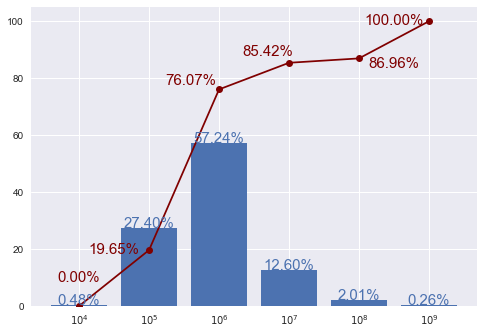

In [313]:
n_peaks_pass = QCs_pass.groupby('mag').aggregate('count').values.T[0] / QCs_pass.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
bars = plt.bar(np.arange(6), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(6):
    plt.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(6):
    per = QCs_pass[(QCs_pass['RSD'] <.2) & (QCs_pass['mag'] == i+4)].shape[0]
    per = per / QCs_pass.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
plt.plot(np.arange(6), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[0,10], [-.5,0], [-.4,3], [-.3,4], [.5,-2], [-.5,0]]
for i in range(6):
    plt.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax = plt.gca()   
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'])   

In [169]:
QCs_pass[QCs_pass['RSD'] >.2].shape

(875, 10)

In [428]:
QCs_final = QCs_pass[QCs_pass['RSD'] <.2]
QCs_final = QCs_eq.loc[QCs_final.index].join(QCs_final).dropna().iloc[:, :15]

In [168]:
QCs_final.shape

(1397, 15)

In [429]:
QCs_final.columns

Index(['QC_2_3.mzXML', 'QC_1_1.mzXML', 'QC_2_2.mzXML', 'QC_4_2.mzXML',
       'QC_1_3.mzXML', 'QC_5_2.mzXML', 'QC_5_1.mzXML', 'QC_2_1.mzXML',
       'QC_3_1.mzXML', 'QC_1_2.mzXML', 'QC_5_3.mzXML', 'QC_3_3.mzXML',
       'QC_3_2.mzXML', 'QC_4_3.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [419]:
from sklearn.decomposition import PCA

In [49]:
QCs_PCA = PCA(n_components=8).fit_transform(np.log(QCs_final.T))

In [50]:
QCs_PCA.shape

(15, 8)

In [51]:
colors = [1,2,3,4] + [10]*11
colors

[1, 2, 3, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

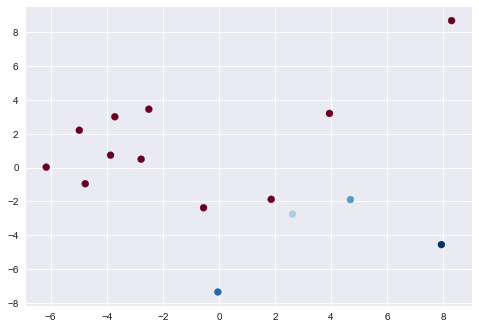

In [52]:
plt.scatter(QCs_PCA[:,0], QCs_PCA[:, 1], c=colors, cmap=plt.cm.RdBu_r)

In [111]:
Samples_final = Samples.iloc[QCs_final.index]

In [112]:
allsamples = QCs_final.join(Samples_final).dropna()

seq = [0, 1, 2, 3, 4, 5, 6, 7, 
      25, 16, 8, 
      28, 22, 17, 9,
      27, 19, 29, 10, 
      23, 24, 11, 
      20, 26, 12, 
      15, 13, 
      18, 21, 14]

allsamples = allsamples.iloc[:,seq]

In [115]:
allsamples.columns

Index(['QC_2_3.mzXML', 'QC_1_1.mzXML', 'QC_2_2.mzXML', 'QC_4_2.mzXML',
       'QC_1_3.mzXML', 'QC_5_2.mzXML', 'QC_5_1.mzXML', 'QC_2_1.mzXML',
       'Sample_4_2.mzXML', 'Sample_1_2.mzXML', 'QC_3_1.mzXML',
       'Sample_5_2.mzXML', 'Sample_3_2.mzXML', 'Sample_1_3.mzXML',
       'QC_1_2.mzXML', 'Sample_5_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_5_3.mzXML', 'QC_5_3.mzXML', 'Sample_3_3.mzXML',
       'Sample_4_1.mzXML', 'QC_3_3.mzXML', 'Sample_2_3.mzXML',
       'Sample_4_3.mzXML', 'QC_3_2.mzXML', 'Sample_1_1.mzXML', 'QC_4_3.mzXML',
       'Sample_2_1.mzXML', 'Sample_3_1.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [116]:
PCA_allsamples = PCA(n_components=8).fit_transform(np.log(allsamples.T))

In [118]:
def deal_names(cols):
    re = []
    for i, name in enumerate(cols):
        if i in [0, 1, 2]:
            re.append('QC-eq-%s' % str(i+1))
        elif i in [3, 4, 5, 6, 7]:
            re.append('QC-eq')
        elif name.startswith('Sa'):
            name = name[:10]
            re.append('Sa-%s' % name[-3])
        else:
            re.append('QC-nor')
    
    return re

In [121]:
names = deal_names(allsamples.columns)

In [141]:
colormap = {'QC-eq-1': ['darkred',True], 'QC-eq-2':['red', True], 'QC-eq-3':['lightcoral', True], 
            'QC-eq': ['gold', True], 'QC-nor': ['olive', True], 
           'Sa-1': ['plum', True], 'Sa-2': ['skyblue', True], 'Sa-3': ['teal', True], 'Sa-4': ['forestgreen', True], 'Sa-5': ['peru', True]}
colormap

{'QC-eq-1': ['darkred', True],
 'QC-eq-2': ['red', True],
 'QC-eq-3': ['lightcoral', True],
 'QC-eq': ['gold', True],
 'QC-nor': ['olive', True],
 'Sa-1': ['plum', True],
 'Sa-2': ['skyblue', True],
 'Sa-3': ['teal', True],
 'Sa-4': ['forestgreen', True],
 'Sa-5': ['peru', True]}

In [148]:
pca_mat = pd.DataFrame(PCA_allsamples)

In [175]:
pca_mat['class'] = names
pca_mat['cate'] = pca_mat['class'].str[:2]
pca_mat.head()

,0,1,2,3,4,5,6,7,class,cate
0,-1.096643,-0.646501,-7.106137,-0.596634,-6.241293,-2.073621,2.648925,5.658996,QC-eq-1,QC
1,4.003415,-1.208744,-3.300326,0.177948,-3.378547,-2.628035,0.205965,3.535194,QC-eq-2,QC
2,-1.082362,-0.513642,-6.693834,-0.750171,-5.339916,-1.708004,1.601172,3.356947,QC-eq-3,QC
3,0.251275,-0.893623,-5.324212,0.411914,-5.033008,-0.780902,0.625079,1.873945,QC-eq,QC
4,0.080883,-1.180220,-5.458777,0.212050,-5.206631,-0.506962,0.997429,0.667268,QC-eq,QC


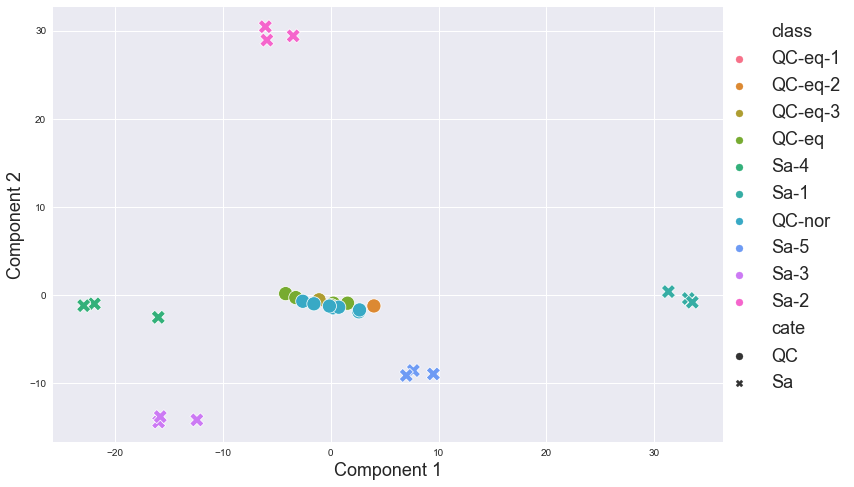

In [345]:
plt.figure(figsize=(12,8))
scatters = sns.scatterplot(0, 1, hue='class', style='cate', data=pca_mat, s=200)
plt.legend(fontsize=18, bbox_to_anchor=[1,1, .2, 0])
plt.xlabel('Component 1', fontsize=18)
plt.ylabel('Component 2', fontsize=18)

plt.savefig('pca_all.png')

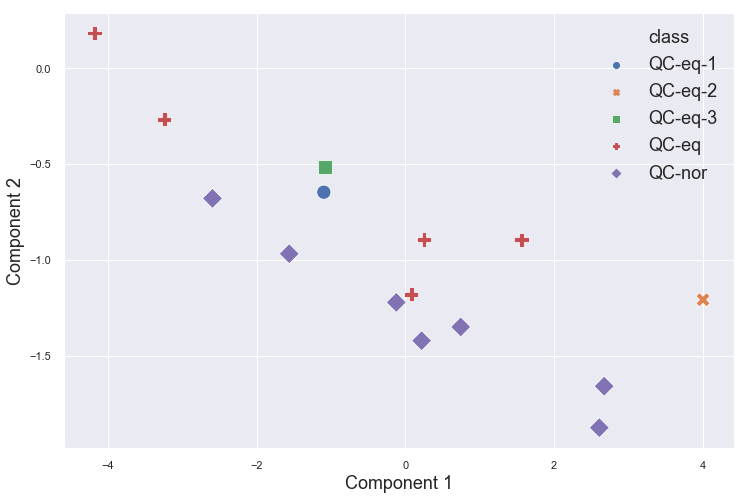

In [299]:
plt.figure(figsize=(12,8))
sns.scatterplot(0, 1, hue='class', style='class', data=pca_mat[pca_mat['cate']=='QC'], s=200)
plt.legend(fontsize=18)
plt.xlabel('Component 1', fontsize=18)
plt.ylabel('Component 2', fontsize=18)
plt.savefig('pca_qc.png')

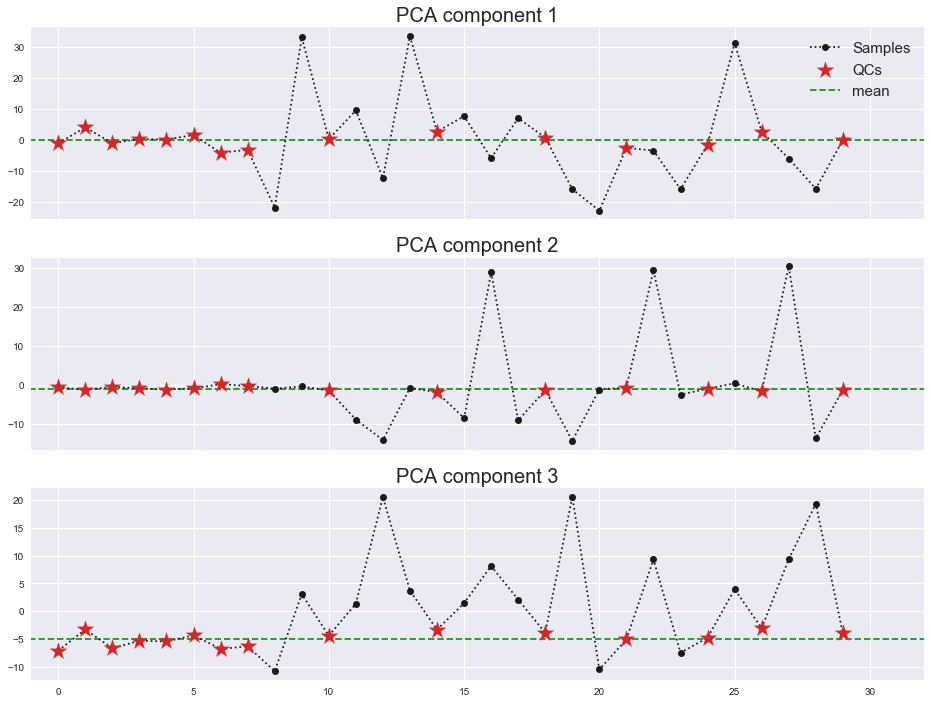

In [337]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(pca_mat[0], ':o', c='k', label='Samples')
ax1.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][0], marker='*', s=300, c='tab:red', zorder=10, label='QCs')
ax1.set_xticklabels([])
ax1.set_title('PCA component 1', fontsize=20)
ax1.hlines(pca_mat[pca_mat['cate'] == 'QC'][0].mean(), -10, 40, linestyle='--', color='forestgreen', label='mean')
ax1.set_xlim(-1,32)
ax1.legend(fontsize=15)

ax2.plot(pca_mat[1], ':o', c='k', )
ax2.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][1], marker='*', s=300, c='tab:red', zorder=10)
ax2.set_xticklabels([])
ax2.set_title('PCA component 2', fontsize=20)
ax2.hlines(pca_mat[pca_mat['cate'] == 'QC'][1].mean(), -10, 40, linestyle='--', color='forestgreen')
ax2.set_xlim(-1,32)

ax3.plot(pca_mat[2], ':o', c='k', )
ax3.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][2], marker='*', s=300, c='tab:red', zorder=10)
ax3.set_title('PCA component 3', fontsize=20)
ax3.hlines(pca_mat[pca_mat['cate'] == 'QC'][2].mean(), -10, 40, linestyle='--', color='forestgreen')
ax3.set_xlim(-1,32)
plt.savefig('PCA_123.png')

In [111]:
lm_test = test.sort_values(by='R2_modified', ascending=False).iloc[[2]][['0.10', '0.15', '0.30', '0.50', '0.75', '1.00']].T

In [112]:
lm_test['x'] = [0.1, 0.15, 0.3, 0.5, 0.75, 1]

In [123]:
lm_test.rename({lm_test.columns[0]:'y'}, axis=1)

,y,x
0.10,NaN,0.10
0.15,NaN,0.15
0.30,4.851030e+05,0.30
0.50,8.736672e+05,0.50
0.75,1.282589e+06,0.75
1.00,1.730982e+06,1.00


In [51]:
test.sort_values(by='R2_modified', ascending=False)

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?,R2_modified
4152,FT4153,3.500155e+05,4.359145e+05,9.938976e+05,1.548381e+06,2.468353e+06,3.220163e+06,9.984008e-01,True,9.984008e-01
6285,FT6286,NaN,NaN,7.658359e+05,1.217857e+06,1.804966e+06,2.465282e+06,NaN,True,9.983103e-01
6494,FT6495,NaN,NaN,4.851030e+05,8.736672e+05,1.282589e+06,1.730982e+06,NaN,True,9.982151e-01
4811,FT4812,4.115848e+05,7.200803e+05,1.627503e+06,2.637766e+06,3.870653e+06,5.107565e+06,9.981895e-01,True,9.981895e-01
1674,FT1675,1.325474e+07,1.944531e+07,4.032408e+07,7.048957e+07,1.094545e+08,1.405793e+08,9.981508e-01,True,9.981508e-01
6431,FT6432,3.323728e+05,6.054901e+05,1.341879e+06,2.285583e+06,3.521311e+06,4.616626e+06,9.977507e-01,True,9.977507e-01
4063,FT4064,2.771952e+05,4.739047e+05,1.128669e+06,1.713193e+06,2.577258e+06,3.512322e+06,9.975490e-01,True,9.975490e-01
3949,FT3950,4.770796e+05,5.944078e+05,1.563973e+06,2.463217e+06,3.829006e+06,4.970750e+06,9.974728e-01,True,9.974728e-01
8474,FT8475,NaN,NaN,7.137643e+05,1.115595e+06,1.628041e+06,2.213158e+06,NaN,True,9.973631e-01
7195,FT7196,4.031846e+05,5.753893e+05,9.869486e+05,1.737768e+06,2.759264e+06,3.662055e+06,9.972258e-01,True,9.972258e-01


In [76]:
test.sort_values(by='R2_modified', ascending=False).iloc[[2000]]

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?,R2_modified
5390,FT5391,483847.483792,576890.909517,910166.039062,699121.6328,2.683665e+06,3.254355e+06,0.856094,True,0.856094


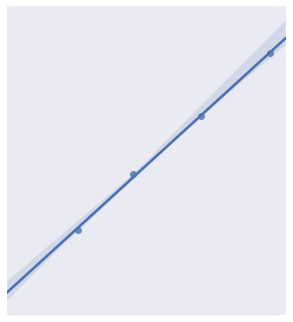

In [114]:
sns.lmplot('x', 'y', data=lm_test)
plt.yticks([])
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('filter_illus.png')

In [132]:
def get_R2_final(x):
    x = x.fillna(-1)

    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    
    y_hat = x / x[-1]
    
    pivot = 0
    for i in range(6):
        if not  x[i] == -1:
            pivot = i
            break
           
    y_i = y_i[pivot:]
    y_hat = y_hat[pivot:]
    return r2_score(y_i, y_hat)

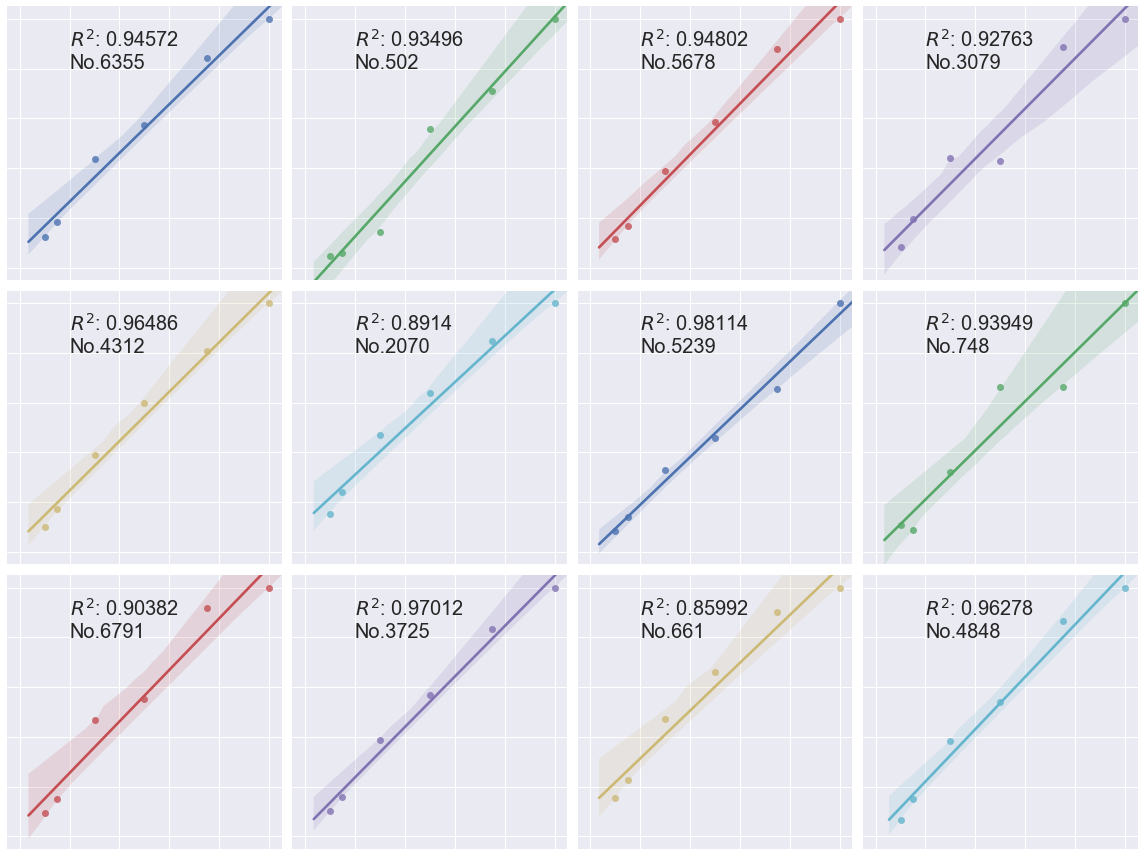

In [159]:
fig = plt.figure(figsize=(16,12))
axs = []
df = test.sort_values(by='R2_modified', ascending=False)[:2000].sample(12)
indices = df.index[:12]
for i in range(12):
    axs.append(fig.add_subplot(3, 4, i+1))

for i, ax in enumerate(axs):
    lm_test = df.loc[[indices[i]]][['0.10', '0.15', '0.30', '0.50', '0.75', '1.00']].T
    lm_test['x'] = [0.1, 0.15, 0.3, 0.5, 0.75, 1]
    lm_test = lm_test.rename({lm_test.columns[0]:'y'}, axis=1)
    lm_test['y'] = lm_test['y'] / lm_test['y'][-1]
    
    sns.regplot('x', 'y', data=lm_test, ax=ax)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    
    R2 = get_R2_final(lm_test['y'])
    R2 = round(R2, 5)
    
    index = indices[i]
    
    ax.text(.2, .8, '$R^2$: %s\nNo.%s' % (R2, index), fontsize=20)
    
plt.tight_layout()
plt.savefig('12lmplot.png', dpi=96)

In [11]:
xx = np.linspace(0, 25, 1000)
yy = np.zeros(1000)

In [12]:
for i, x in enumerate(xx):
    if x < 2:
        yy[i] = 2
    if 2 <= x < 8:
        yy[i] = 2 + (x-2) * 8
    if 8 <= x < 16:
        yy[i] = 50
    if 16 <= x < 17:
        yy[i] = 50 + (x-16) * 48
    if 17 <= x < 21:
        yy[i] = 98
    if 21 <= x < 21.1:
        yy[i] = 98 - (x-21) * 960
    if x >= 21.1:
        yy[i] = 2

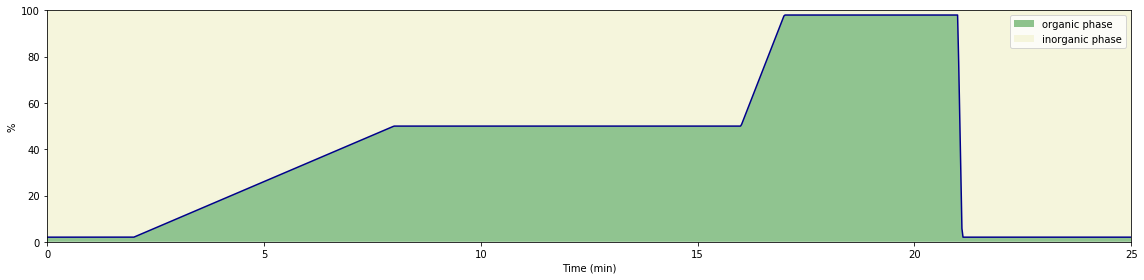

In [33]:
plt.figure(figsize=(16, 4))
plt.plot(xx, yy, c='darkblue')
plt.fill_between(xx, 0, yy, facecolor='forestgreen', alpha=.5, label='organic phase')
plt.fill_between(xx, yy, 100, facecolor='beige', alpha=1, label='inorganic phase')
plt.xlim(0,25)
plt.ylim(0,100)
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('gradient.png')

In [346]:
now = time.strftime('%H %M-%d%h')
dill.dump_session('%s.jupyterData' % now)